# 生成差商表

In [161]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 禁用科学计数法
np.set_printoptions(suppress=True) 
# 设置一行的最大宽度限制为 1000 个字符
np.set_printoptions(linewidth=1000)

# 获取离散点
x = np.arange(-5,6,1)
values = np.vectorize(lambda x: 1/(1 + x**2))(x)
# 计算插值矩阵
n = len(x)
MatrixInterpolation = np.zeros((n, n))
MatrixInterpolation[:, 0] = values
for j in range(1, n, 1): # 这里应该从列开始，一行一行的遍历：
    for i in range(j, n, 1):
        MatrixInterpolation[i, j] = ((MatrixInterpolation[i, j-1] - MatrixInterpolation[i-1, j-1])/(x[i] - x[i-j]))


# 第一类边界条件

In [162]:
# 初始化
# 开始样条插值 —— 第一种边界条件
x = np.linspace(-5, 5, 11)
y = np.vectorize(lambda x: 1/(1 + x**2))(x)
t = sp.symbols('x')
dS =[5/338, -5/338]# 边界条件

# 调试
'''x = [27.7, 28, 29, 30]
y = [4.1, 4.3, 4.1, 3.0]
dS = [3, -4]'''
h_x = np.diff(x)
n = len(h_x)
A = np.eye(n+1)*2 # 系数矩阵
D = np.zeros(n+1) # 右端向量

def MatrixInterpolation(x, values):
    # 计算插值矩阵
    n = len(x)
    Matrix = np.zeros((n, n))
    Matrix[:, 0] = values
    for j in range(1, n, 1): # 这里应该从列开始，一行一行的遍历：
        for i in range(j, n, 1):
            Matrix[i, j] = ((Matrix[i, j-1] - Matrix[i-1, j-1])/(x[i] - x[i-j]))
    return Matrix


def divided_difference(x, y):
    # 计算差商
    if len(x) == 1:
        return y[0]
    return ((divided_difference(x[1:], y[1:]) - divided_difference(x[:-1], y[:-1])) / (x[-1] - x[0])).round(5)

# 开始插值 
# 注意P43页的要求，这里面lambda_0 = 1, mu_n = 1
A[0, 1] = 1
A[n, n-1] = 1
for i in range(1, n, 1):
    A[i, (i + 1)] = h_x[i]/(h_x[i] + h_x[i-1]) # lambda_i
    A[i, (i - 1)] = h_x[i-1]/(h_x[i-1] + h_x[i]) # mu_j
for i in range(1, n, 1):
    D[i] = 6*divided_difference(x[i-1:i+2],y[i-1:i+2])
# D[n-1] = 6*(divided_difference(x[0:2], y[0:2]) - divided_difference(x[n-2:n], y[n-2:n]))/(h_x[0]+h_x[n-1])
D[0] = 6/h_x[0]*(divided_difference([x[0], x[1]], y[0:2]) - dS[0])
D[n] = 6/h_x[n-1]*(dS[1]-divided_difference([x[n-1], x[n]], y[-2:]))
M = np.linalg.solve(A, D)

# 生成表达式

In [163]:
# 手动添加缩进，不然会混用空格和制表符
for i in range(0, 10, 1):
    print(f'elif {x[i]} <= t < {x[i+1]}:\nreturn M[{i}]*(x[{i+1}] - t)^3/(6*h_x[{i}]) + M[{i+1}]*(t - x[{i}])^3/(6*h_x[{i}]) + (y[{i}] - (M[{i}]*h_x[{i}]^2)/6)*(x[{i+1}] - t)/h_x[{i}] + (y[{i+1}] - (M[{i+1}]*h_x[{i}]^2)/6)*(t - x[{i}])/h_x[{i}]')

elif -5.0 <= t < -4.0:
return M[0]*(x[1] - t)^3/(6*h_x[0]) + M[1]*(t - x[0])^3/(6*h_x[0]) + (y[0] - (M[0]*h_x[0]^2)/6)*(x[1] - t)/h_x[0] + (y[1] - (M[1]*h_x[0]^2)/6)*(t - x[0])/h_x[0]
elif -4.0 <= t < -3.0:
return M[1]*(x[2] - t)^3/(6*h_x[1]) + M[2]*(t - x[1])^3/(6*h_x[1]) + (y[1] - (M[1]*h_x[1]^2)/6)*(x[2] - t)/h_x[1] + (y[2] - (M[2]*h_x[1]^2)/6)*(t - x[1])/h_x[1]
elif -3.0 <= t < -2.0:
return M[2]*(x[3] - t)^3/(6*h_x[2]) + M[3]*(t - x[2])^3/(6*h_x[2]) + (y[2] - (M[2]*h_x[2]^2)/6)*(x[3] - t)/h_x[2] + (y[3] - (M[3]*h_x[2]^2)/6)*(t - x[2])/h_x[2]
elif -2.0 <= t < -1.0:
return M[3]*(x[4] - t)^3/(6*h_x[3]) + M[4]*(t - x[3])^3/(6*h_x[3]) + (y[3] - (M[3]*h_x[3]^2)/6)*(x[4] - t)/h_x[3] + (y[4] - (M[4]*h_x[3]^2)/6)*(t - x[3])/h_x[3]
elif -1.0 <= t < 0.0:
return M[4]*(x[5] - t)^3/(6*h_x[4]) + M[5]*(t - x[4])^3/(6*h_x[4]) + (y[4] - (M[4]*h_x[4]^2)/6)*(x[5] - t)/h_x[4] + (y[5] - (M[5]*h_x[4]^2)/6)*(t - x[4])/h_x[4]
elif 0.0 <= t < 1.0:
return M[5]*(x[6] - t)^3/(6*h_x[5]) + M[6]*(t - x[5])^3/(6*h

# 拉格朗日多项式插值

[ 0.03846154  0.02036199  0.01040724  0.00633484  0.00429864 -0.0020362  -0.00113122  0.00108597 -0.00042986  0.00011312 -0.00002262]


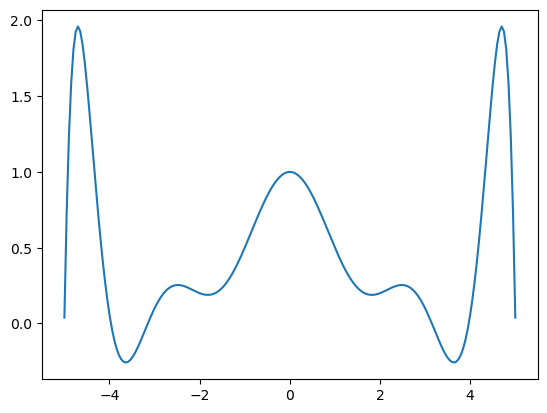

In [313]:
X = sp.symbols('x')

x = np.arange(-5,6,1)
y = 1/(1 + x**2)

n = len(x)
# 为了计算方便实际使用牛顿多项式，本质上没有区别，两者等价。
def calculate(coeffs, x, t):
    result = 0 # p0
    for i in range(0, len(coeffs)):
        mult = 1
        for j in range(0, i):
            mult = mult * (t - x[j])
        mult = coeffs[i] * mult
        result = result + mult
    return result

coeffs = np.array([divided_difference(x[:i+1], y[:i+1]) for i in range(n)])
print(coeffs)
expr = calculate(coeffs, x, sp.symbols('x'))
expr
# expr.simplify()
plt.plot(np.linspace(-5, 5, 200), calculate(coeffs, x, np.linspace(-5, 5, 200)))

In [314]:


### 测试用
x = np.array([0.4, 0.55, 0.65, 0.8, 0.9, 1.05])
y = np.array([0.41075, 0.57815, 0.69675, 0.88811, 1.02652, 1.25382])
# x = np.array([0, 1])
# y = np.array([0, 1])
n = len(x)

# 以下三种写法等价
def calculate(coeffs, x, t):
    return 0 if len(coeffs) == 0 else coeffs[0] + (t - x[0]) * calculate(coeffs[1:], x[1:], t)

def calculate(coeffs, x, t):
    res = coeffs[-1]
    for i in range(len(coeffs)-1, -1, -1):
        res = res * (t - x[i]) + coeffs[i]
    return res

from functools import reduce
def calculate(coeffs, x, t):
    return reduce(lambda res, i: res * (t - x[i]) + coeffs[i], range(len(coeffs)-1, -1, -1), coeffs[-1])


coeffs = np.array([divided_difference(x[:i+1], y[:i+1]) for i in range(n)])
### 测试用结束


# 开始绘图

0.04716801119813742


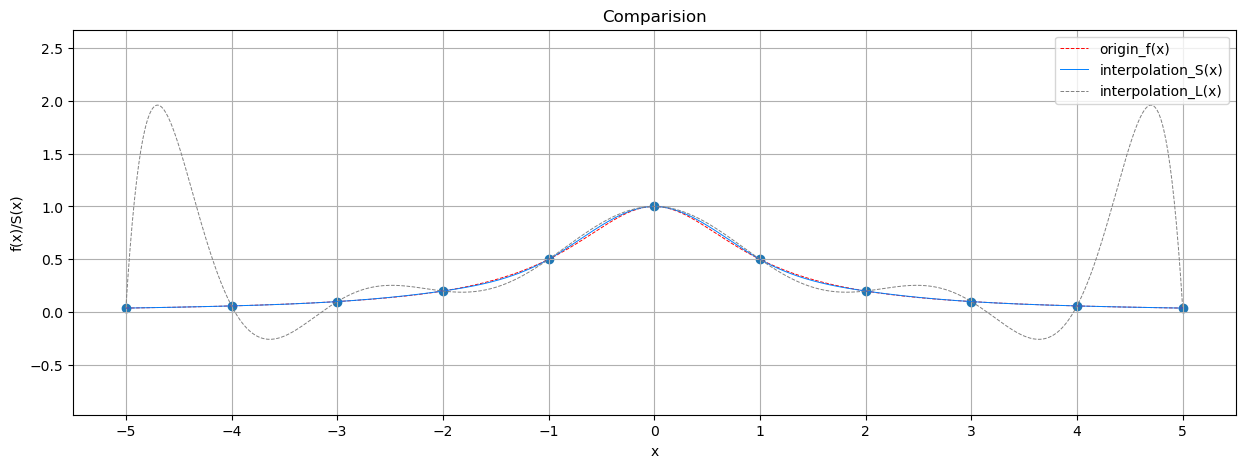

In [312]:
# 定义一个分段函数
@np.vectorize
def piecewise_function(t):
    if -5.0 <= t < -4.0:
        return (
            M[0] * (x[1] - t) ** 3 / (6 * h_x[0])
            + M[1] * (t - x[0]) ** 3 / (6 * h_x[0])
            + (y[0] - (M[0] * h_x[0] ** 2) / 6) * (x[1] - t) / h_x[0]
            + (y[1] - (M[1] * h_x[0] ** 2) / 6) * (t - x[0]) / h_x[0]
        )
    elif -4.0 <= t < -3.0:
        return (
            M[1] * (x[2] - t) ** 3 / (6 * h_x[1])
            + M[2] * (t - x[1]) ** 3 / (6 * h_x[1])
            + (y[1] - (M[1] * h_x[1] ** 2) / 6) * (x[2] - t) / h_x[1]
            + (y[2] - (M[2] * h_x[1] ** 2) / 6) * (t - x[1]) / h_x[1]
        )
    elif -3.0 <= t < -2.0:
        return (
            M[2] * (x[3] - t) ** 3 / (6 * h_x[2])
            + M[3] * (t - x[2]) ** 3 / (6 * h_x[2])
            + (y[2] - (M[2] * h_x[2] ** 2) / 6) * (x[3] - t) / h_x[2]
            + (y[3] - (M[3] * h_x[2] ** 2) / 6) * (t - x[2]) / h_x[2]
        )
    elif -2.0 <= t < -1.0:
        return (
            M[3] * (x[4] - t) ** 3 / (6 * h_x[3])
            + M[4] * (t - x[3]) ** 3 / (6 * h_x[3])
            + (y[3] - (M[3] * h_x[3] ** 2) / 6) * (x[4] - t) / h_x[3]
            + (y[4] - (M[4] * h_x[3] ** 2) / 6) * (t - x[3]) / h_x[3]
        )
    elif -1.0 <= t < 0.0:
        return (
            M[4] * (x[5] - t) ** 3 / (6 * h_x[4])
            + M[5] * (t - x[4]) ** 3 / (6 * h_x[4])
            + (y[4] - (M[4] * h_x[4] ** 2) / 6) * (x[5] - t) / h_x[4]
            + (y[5] - (M[5] * h_x[4] ** 2) / 6) * (t - x[4]) / h_x[4]
        )
    elif 0.0 <= t < 1.0:
        return (
            M[5] * (x[6] - t) ** 3 / (6 * h_x[5])
            + M[6] * (t - x[5]) ** 3 / (6 * h_x[5])
            + (y[5] - (M[5] * h_x[5] ** 2) / 6) * (x[6] - t) / h_x[5]
            + (y[6] - (M[6] * h_x[5] ** 2) / 6) * (t - x[5]) / h_x[5]
        )
    elif 1.0 <= t < 2.0:
        return (
            M[6] * (x[7] - t) ** 3 / (6 * h_x[6])
            + M[7] * (t - x[6]) ** 3 / (6 * h_x[6])
            + (y[6] - (M[6] * h_x[6] ** 2) / 6) * (x[7] - t) / h_x[6]
            + (y[7] - (M[7] * h_x[6] ** 2) / 6) * (t - x[6]) / h_x[6]
        )
    elif 2.0 <= t < 3.0:
        return (
            M[7] * (x[8] - t) ** 3 / (6 * h_x[7])
            + M[8] * (t - x[7]) ** 3 / (6 * h_x[7])
            + (y[7] - (M[7] * h_x[7] ** 2) / 6) * (x[8] - t) / h_x[7]
            + (y[8] - (M[8] * h_x[7] ** 2) / 6) * (t - x[7]) / h_x[7]
        )
    elif 3.0 <= t < 4.0:
        return (
            M[8] * (x[9] - t) ** 3 / (6 * h_x[8])
            + M[9] * (t - x[8]) ** 3 / (6 * h_x[8])
            + (y[8] - (M[8] * h_x[8] ** 2) / 6) * (x[9] - t) / h_x[8]
            + (y[9] - (M[9] * h_x[8] ** 2) / 6) * (t - x[8]) / h_x[8]
        )
    elif 4.0 <= t <= 5.0:
        return (
            M[9] * (x[10] - t) ** 3 / (6 * h_x[9])
            + M[10] * (t - x[9]) ** 3 / (6 * h_x[9])
            + (y[9] - (M[9] * h_x[9] ** 2) / 6) * (x[10] - t) / h_x[9]
            + (y[10] - (M[10] * h_x[9] ** 2) / 6) * (t - x[9]) / h_x[9]
        )


# 将分段函数转换为NumPy函数

# 生成x的数值范围
x_values = np.linspace(-5, 5, 1000)

# 计算函数值
y_values = piecewise_function(x_values)
print(piecewise_function(-4.5))

# 绘制函数图形
plt.figure(figsize=(15, 5))
plt.plot(
    x_values,
    1 / (1 + x_values**2),
    label="origin_f(x)",
    linewidth=0.7,
    color="red",
    linestyle="--",
)
plt.plot(
    x_values, y_values, label="interpolation_S(x)", linewidth=0.7, color=(0.0, 0.5, 1.0)
)
plt.plot(
    x_values,
    calculate(coeffs, x, x_values),
    label="interpolation_L(x)",
    linewidth=0.7,
    color="grey",
    linestyle="--",
)
plt.scatter(x, 1 / (1 + x**2), marker="o")
plt.xlabel("x")
plt.ylabel("f(x)/S(x)")
plt.xlim([-5, 5])
plt.xticks(x)
# plt.yticks([2])
plt.title("Comparision")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

# 误差分析

In [166]:
y_interpolation = np.vectorize(piecewise_function)(np.arange(-5,5,0.1))
value_inter = np.dstack((np.arange(-5,5,0.1), y_interpolation))
y_origin = np.vectorize(lambda x:1/(1 + x**2))(np.arange(-5,5,0.1))
value_origin = np.dstack((np.arange(-5,5,0.1), y_origin))
error = (value_inter - value_origin).round(2)
error

array([[[ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  , -0.  ],
        [ 0.  , -0.  ],
        [ 0.  , -0.  ],
        [ 0.  , -0.  ],
        [ 0.  , -0.  ],
        [ 0.  , -0.  ],
        [ 0.  , -0.  ],
        [ 0.  , -0.  ],
        [ 0.  , -0.  ],
        [ 0.  , -0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  ,  0.  ],
        [ 0.  , -0.  ],
        [ 0.  , -0.  ],
        [ 0.  , -0.01],
        [ 0.  , -0.01],
        [ 0.  , -0.01],
        [ 0.  , -0.01],
        [ 0.  , -0.01],
        [ 0.  , -0.01],
        [ 0.  , -0.01],
        [ 0.  , -0.  ],
        [ 0.  , 